# Karakteristike snabdijevanja toplotnom energijom - Kotlovnica Podvožnjak

In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt

KJKP "Toplane-Sarajevo" d.o.o. Sarajevo je ustupilo tehničke karakteristike kotlovnice "Podvožnjak". Radi se o četiri grane sa stambenim i poslovnim prostorima koje imaju instalirana mjerila potrošnje toplotne energije na jednocijevnom sistemu sa pohranom podataka na satnoj rezoluciji. Grane obuhvataju novije uglavnom novije objekte, te iz tog razloga posjeduju ove podatke. Preduzeće je ustupilo mjesečna očitanja protoka, temperature polaza i povrata, trenutne snage, te energije i potrošnje za period 1.2019. do 12. 2021. za vrijeme trajanja grijne sezone (januar - maj, te oktobar - decembar). Uz to, dostavljeni su i satni podaci potrošnje toplotne energije na ove četiri grane.Kalorimetri u ovom slučaju imaju memoriju u opsegu od oko jednog mjeseca, što znači da su satni podaci dostupni u periodu od 4.12.2021. do 6.1.2022. godine. Ovim podacima će se dodijeliti vremenski otisci u vidu datuma i sata kako bi se kasnije analizirali po vremenskim značajkama. Svi podaci su spašeni u fajlu "Podvožnjak. xlsx".

In [127]:
file_teh=pd.read_excel("Podvožnjak.xlsx",sheet_name="PODVOŽNJAK",header=1)

Navedeni fajl se može otvoriti u Excelu u izvornom obliku. U ovom slučaju su prikazana prva četiri reda, te će se fajl dalje prilagoditi upotrebi u ovom Notebooku.

In [128]:
file_teh.head(4)

,Kotlovnica Podvožnjak Grana: \nKontrolno Kumrovec neboder,78571344,"Instalisana snaga: 3,9 MW\nPovršina stambeni: 15658,70 Površina poslovni: 6835,16",Unnamed: 3,"Instalisana snaga, MW","Površina - stambeni, m2",Površina poslovni m2,Datum,2021-12-18 00:00:00,2021-11-18 00:00:00,...,2020-02-20 00:00:00,2020-01-21 00:00:00,2019-12-19 00:00:00,2019-11-19 00:00:00,2019-10-22 00:00:00,2019-05-21 00:00:00,2019-04-18 00:00:00,2019-03-19 00:00:00,2019-02-19 00:00:00,2019-01-21 00:00:00
0,NaN,NaN,NaN,NaN,3.9,15658.7,6835.16,Protok,191.16,192.6,...,178.2,188.28,190.44,188.28,2.52,0,185.76,189.36,188.64,138.24
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Energija kWh,11627900,11024900,...,5706300,5135500,4299500,3808900,3590500,3493900,3295700,2959400,2510600,1838300
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Potrosnja kWh,603000,443900,...,570800,836000,490600,218400,96600,198200,336300,448800,672300,835300
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Trenutna snaga kW,1183,1084,...,711,1436,1192,340,1,0,477,908,1111,1267


Najprije će se izdvojiti osnovne karakteristike, kao što su snaga, te površine objekata:

In [130]:
info=pd.DataFrame()
info=file_teh[["Instalisana snaga, MW","Površina - stambeni, m2","Površina poslovni m2"]].dropna()

In [131]:
loko=["Kotlovnica Podvožnjak Grana: Kontrolno Kumrovec neboder","Kotlovnica Podvožnjak Grana:Kontrolno niz oko kotlovnice",
     "Kotlovnica Podvožnjak Grana:Kontrolno niz uz neboder Vranica ","Kotlovnica Podvožnjak Grana:Kontrolno Vranica neboderi"]
info.set_index([loko],inplace=True)

Grane 1 i 2 imaju veću instalisanu snagu, ali se toplotnom energijom snabdijeva i veća površina objekata. Na svim granama je znatno veći broj stambenih u odnosu na poslovne objekte. Naročito se to to odnos na nebodere "Vranica".

In [132]:
info

,"Instalisana snaga, MW","Površina - stambeni, m2",Površina poslovni m2
Kotlovnica Podvožnjak Grana: Kontrolno Kumrovec neboder,3.90,15658.7,6835.16
Kotlovnica Podvožnjak Grana:Kontrolno niz oko kotlovnice,3.83,16923.7,3379.67
Kotlovnica Podvožnjak Grana:Kontrolno niz uz neboder Vranica,2.29,12615.0,3665.70
Kotlovnica Podvožnjak Grana:Kontrolno Vranica neboderi,2.18,19512.0,242.59


In [136]:
info["Ukupna površina, m2"]=info["Površina - stambeni, m2"]+info["Površina poslovni m2"]
info["Ukupna površina, m2"]

Kotlovnica Podvožnjak Grana: Kontrolno Kumrovec neboder          22493.86
Kotlovnica Podvožnjak Grana:Kontrolno niz oko kotlovnice         20303.37
Kotlovnica Podvožnjak Grana:Kontrolno niz uz neboder Vranica     16280.70
Kotlovnica Podvožnjak Grana:Kontrolno Vranica neboderi           19754.59
Name: Ukupna površina, m2, dtype: float64

Text(0.5, 1.0, 'Površina poslovnog prostora')

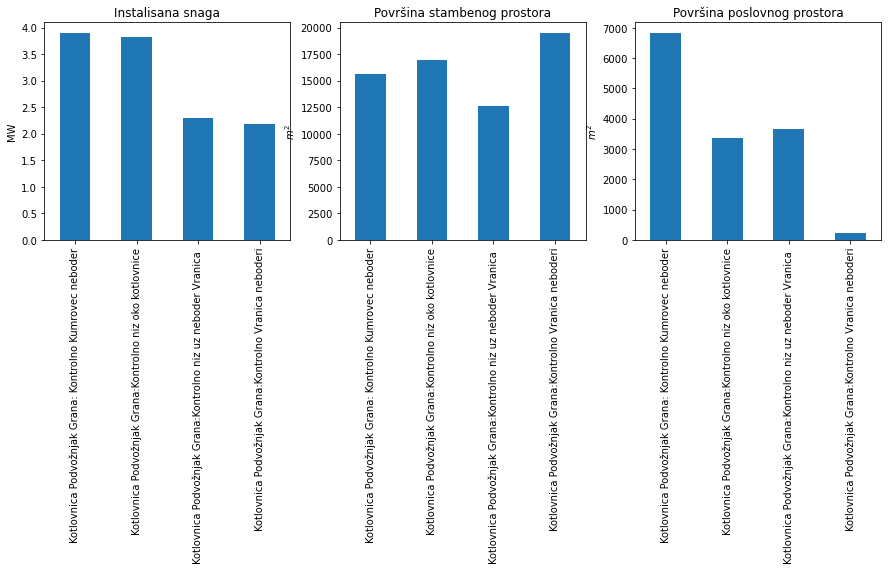

In [48]:
fig,ax=plt.subplots(ncols=3, figsize=(15,4))
info["Instalisana snaga, MW"].plot(kind="bar",ax=ax[0])
ax[0].set_ylabel("MW")
ax[0].set_title("Instalisana snaga")

info["Površina - stambeni, m2"].plot(kind="bar",ax=ax[1])
ax[1].set_ylabel("$m^{2}$")
ax[1].set_title("Površina stambenog prostora")

info["Površina poslovni m2"].plot(kind="bar",ax=ax[2])
ax[2].set_ylabel("$m^{2}$")
ax[2].set_title("Površina poslovnog prostora")

Iz fajla će se dalje izdvojiti mjesečni podaci u opsegu 1.2019 - 12.2021. za sljedeće karakteristike na ovim lokacijama:
<br> protok vode,
<br> kumulativno - energija
<br> potrošnja
<br> trenutna snaga
<br> temperature polaza i povrata.

In [75]:
protok=file_teh[file_teh[file_teh.columns[7]]=="Protok"].iloc[:,9:].transpose()
protok.columns=loko

energija=file_teh[file_teh[file_teh.columns[7]]=="Energija kWh"].iloc[:,9:].transpose()
energija.columns=loko

potrosnja=file_teh[file_teh[file_teh.columns[7]]=="Potrosnja kWh"].iloc[:,9:].transpose()
potrosnja.columns=loko

snaga_tr=file_teh[file_teh[file_teh.columns[7]]=="Trenutna snaga kW"].iloc[:,9:].transpose()
snaga_tr.columns=loko


temp_pol=file_teh[file_teh[file_teh.columns[7]]=="Temp polaz"].iloc[:,9:].transpose()
temp_pov=file_teh[file_teh[file_teh.columns[7]]=="Temp povrat"].iloc[:,9:].transpose()
temp_pol.columns=loko
temp_pov.columns=loko

In [134]:
protok.head(2) #prva 2 reda

,Kotlovnica Podvožnjak Grana: Kontrolno Kumrovec neboder,Kotlovnica Podvožnjak Grana:Kontrolno niz oko kotlovnice,Kotlovnica Podvožnjak Grana:Kontrolno niz uz neboder Vranica,Kotlovnica Podvožnjak Grana:Kontrolno Vranica neboderi,Dan,Mjesec,Godina
2021-11-18,192.6,176.4,109.2,105.12,18,11,2021
2021-10-19,194.04,178.2,113.52,105.36,19,10,2021


In [137]:
energija.head(2) #prva 2 reda

,Kotlovnica Podvožnjak Grana: Kontrolno Kumrovec neboder,Kotlovnica Podvožnjak Grana:Kontrolno niz oko kotlovnice,Kotlovnica Podvožnjak Grana:Kontrolno niz uz neboder Vranica,Kotlovnica Podvožnjak Grana:Kontrolno Vranica neboderi,Dan,Mjesec,Godina
2021-11-18,11024900,12922100,7962600,7358400,18,11,2021
2021-10-19,10581000,12391100,7663400,7074000,19,10,2021


In [138]:
potrosnja.head(2)

,Kotlovnica Podvožnjak Grana: Kontrolno Kumrovec neboder,Kotlovnica Podvožnjak Grana:Kontrolno niz oko kotlovnice,Kotlovnica Podvožnjak Grana:Kontrolno niz uz neboder Vranica,Kotlovnica Podvožnjak Grana:Kontrolno Vranica neboderi,Dan,Mjesec,Godina
2021-11-18,443900,531000,299200,284400,18,11,2021
2021-10-19,259000,301700,173000,164700,19,10,2021


In [140]:
snaga_tr.head(2)

,Kotlovnica Podvožnjak Grana: Kontrolno Kumrovec neboder,Kotlovnica Podvožnjak Grana:Kontrolno niz oko kotlovnice,Kotlovnica Podvožnjak Grana:Kontrolno niz uz neboder Vranica,Kotlovnica Podvožnjak Grana:Kontrolno Vranica neboderi,Dan,Mjesec,Godina
2021-11-18,1084,1345,744,719,18,11,2021
2021-10-19,842,1192,630,615,19,10,2021


In [142]:
temp_pol.head(2)

,Kotlovnica Podvožnjak Grana: Kontrolno Kumrovec neboder,Kotlovnica Podvožnjak Grana:Kontrolno niz oko kotlovnice,Kotlovnica Podvožnjak Grana:Kontrolno niz uz neboder Vranica,Kotlovnica Podvožnjak Grana:Kontrolno Vranica neboderi,Dan,Mjesec,Godina
2021-11-18,54.47,54.88,53.05,52.79,18,11,2021
2021-10-19,52.13,52.63,50.49,50.53,19,10,2021


In [143]:
temp_pov.head(2)

,Kotlovnica Podvožnjak Grana: Kontrolno Kumrovec neboder,Kotlovnica Podvožnjak Grana:Kontrolno niz oko kotlovnice,Kotlovnica Podvožnjak Grana:Kontrolno niz uz neboder Vranica,Kotlovnica Podvožnjak Grana:Kontrolno Vranica neboderi,Dan,Mjesec,Godina
2021-11-18,49.56,48.2,47.05,46.84,18,11,2021
2021-10-19,48.24,46.87,45.77,45.45,19,10,2021


In [147]:
temp_pov.head(2)

,Kotlovnica Podvožnjak Grana: Kontrolno Kumrovec neboder,Kotlovnica Podvožnjak Grana:Kontrolno niz oko kotlovnice,Kotlovnica Podvožnjak Grana:Kontrolno niz uz neboder Vranica,Kotlovnica Podvožnjak Grana:Kontrolno Vranica neboderi,Dan,Mjesec,Godina
2021-11-18,49.56,48.2,47.05,46.84,18,11,2021
2021-10-19,48.24,46.87,45.77,45.45,19,10,2021


Naredni grafovi su kreirani u razdoblju januar - maj i oktobar - decembar za 2019., 2020. i 2021. godinu.Protok vode i  potrošnja toplotne energije je znatno veća za prve dvije grane, koje imaju i veću površinu objekata. Ono što se može primijetiti je da neboderi "Vranica" imaju tek nešto manju površinu u odnosu na Granu 2, ali je potrošnja znatno manja. Trend potrošnje u 2021. je nešto drugačiji u odnosu na 2020. godinu. U 2020. godini je najveće opterećenje zabilježeno početkom godine, dok u 2021. godini se pojavljuju tzv. peakovi pri kraju sezone. Maksimalno zabilježena snaga je oko 3,2 MW (instalirani kapacitet 3,9 MW) zabilježena 14.2.2021. godine, što je značajno odstupanje u odnosu na prethodnu godinu. Ostale grane za 2021. bilježe maksimum na isti datum, pri čemu trenutna snaga ne prelazi 1700 MW.

Text(0.5, 1.0, 'Trenutna snaga')

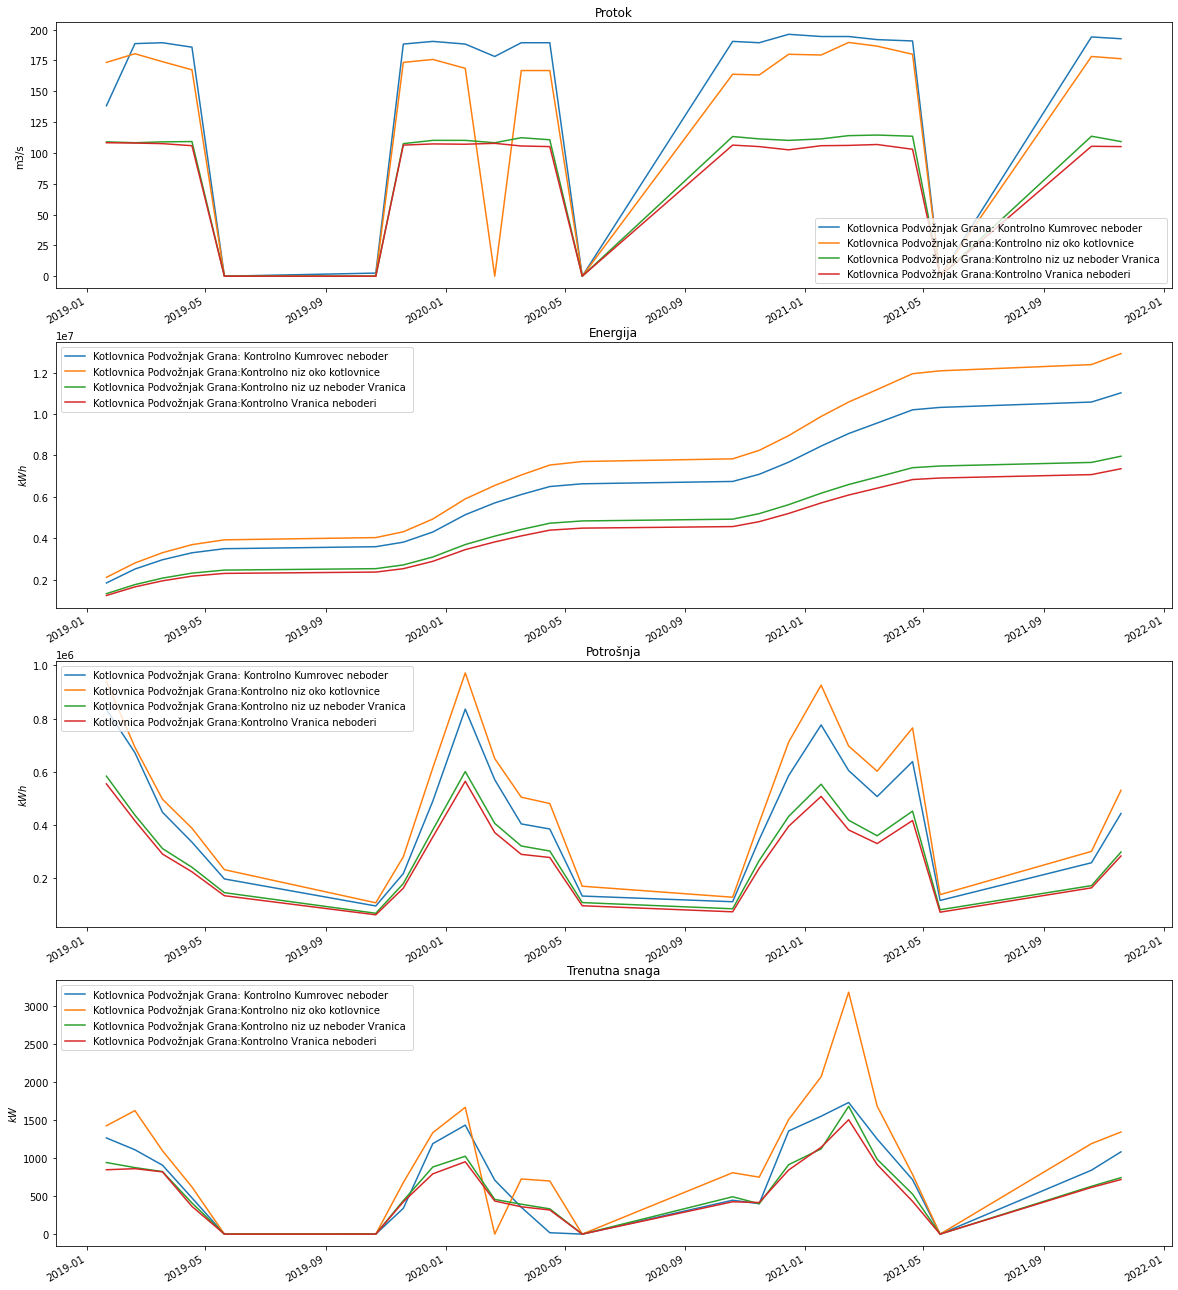

In [82]:
fig,ax=plt.subplots(nrows=4, figsize=(20,25))
protok.plot(kind="line",ax=ax[0])
ax[0].set_ylabel("m3/h")
ax[0].set_title("Protok")

energija.plot(kind="line",ax=ax[1])
ax[1].set_ylabel("$kWh$")
ax[1].set_title("Energija")

potrosnja.plot(kind="line",ax=ax[2])
ax[2].set_ylabel("$kWh$")
ax[2].set_title("Potrošnja")


snaga_tr.plot(kind="line",ax=ax[3])
ax[3].set_ylabel("$kW$")
ax[3].set_title("Trenutna snaga")


In [151]:
snaga_tr[snaga_tr[loko[1]]>=3000]

,Kotlovnica Podvožnjak Grana: Kontrolno Kumrovec neboder,Kotlovnica Podvožnjak Grana:Kontrolno niz oko kotlovnice,Kotlovnica Podvožnjak Grana:Kontrolno niz uz neboder Vranica,Kotlovnica Podvožnjak Grana:Kontrolno Vranica neboderi,Dan,Mjesec,Godina
2021-02-14,1734,3187,1684,1507,14,2,2021


Grana 2 bilježi nultu vrijednost snage i protoka na 20.2.2020., što može biti posljedica kvara/održavanja sistema, s obzirom da su ostale grane radile neometano. Također sumnju u podatak uvodi i činjenica da mjerilo isti dan bilježi temperaturu povrata od oko 72°C, za oko tridesetak stepeni °C veću od temperature polaza.

In [148]:
snaga_tr[snaga_tr[loko[1]]==0]

,Kotlovnica Podvožnjak Grana: Kontrolno Kumrovec neboder,Kotlovnica Podvožnjak Grana:Kontrolno niz oko kotlovnice,Kotlovnica Podvožnjak Grana:Kontrolno niz uz neboder Vranica,Kotlovnica Podvožnjak Grana:Kontrolno Vranica neboderi,Dan,Mjesec,Godina
2021-05-18,0,0,0,0,18,5,2021
2020-05-19,0,0,0,0,19,5,2020
2020-02-20,711,0,457,436,20,2,2020
2019-10-22,1,0,0,0,22,10,2019
2019-05-21,0,0,0,0,21,5,2019


In [149]:
protok[protok[loko[1]]==0]

,Kotlovnica Podvožnjak Grana: Kontrolno Kumrovec neboder,Kotlovnica Podvožnjak Grana:Kontrolno niz oko kotlovnice,Kotlovnica Podvožnjak Grana:Kontrolno niz uz neboder Vranica,Kotlovnica Podvožnjak Grana:Kontrolno Vranica neboderi,Dan,Mjesec,Godina
2021-05-18,0,0,0,0,18,5,2021
2020-05-19,0,0,0,0,19,5,2020
2020-02-20,178.2,0,108.24,107.76,20,2,2020
2019-10-22,2.52,0,0,0,22,10,2019
2019-05-21,0,0,0,0,21,5,2019


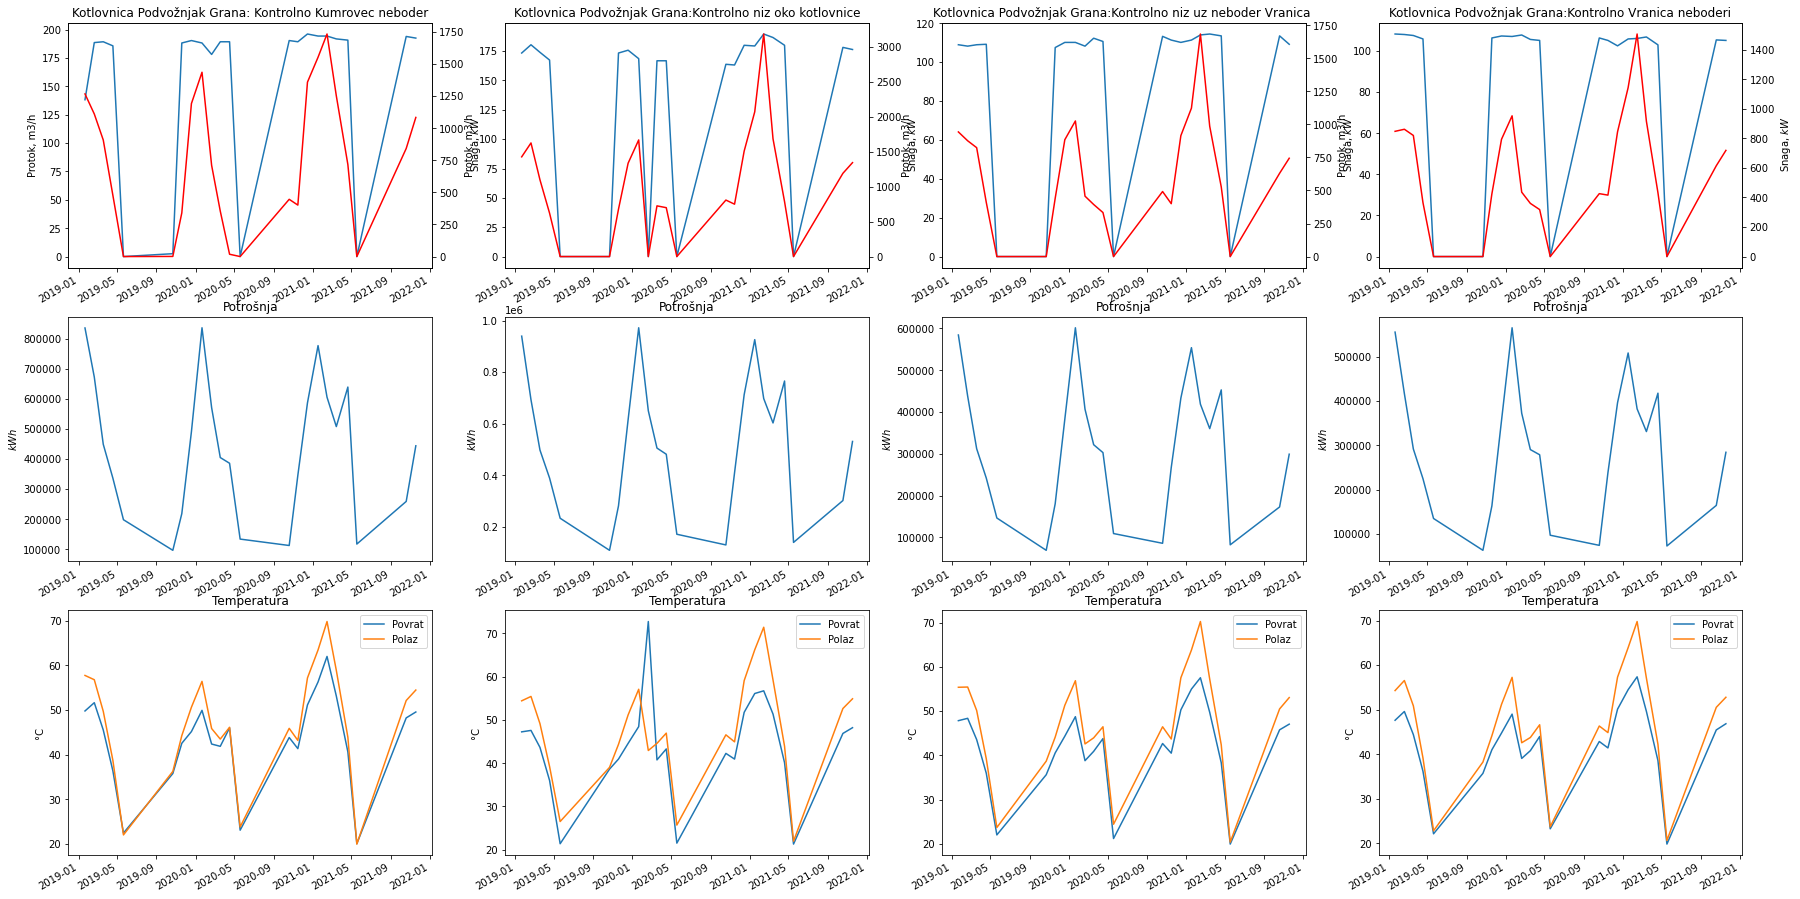

In [107]:
fig,ax=plt.subplots(nrows=3,ncols=len(loko),figsize=(30,17))

for k,element in enumerate(loko):
    protok[element].plot(kind="line",ax=ax[0,k])
    ax[0,k].set_ylabel("Protok, m3/h")
    ax[0,k].set_title(loko[k])
    axtw=ax[0,k].twinx()
    snaga_tr[element].plot(kind="line",ax=axtw,color="red")
    axtw.set_ylabel(" Snaga, $kW$")

    potrosnja[element].plot(kind="line",ax=ax[1,k])
    ax[1,k].set_ylabel("$kWh$")
    ax[1,k].set_title("Potrošnja")

    
    temp_pov[element].plot(kind="line",ax=ax[2,k], label="Povrat")
    temp_pol[element].plot(kind="line",ax=ax[2,k], label="Polaz")
    ax[2,k].set_ylabel("°C")
    ax[2,k].set_title("Temperatura")
    ax[2,k].legend()




In [154]:
temp_pol[temp_pol[loko[1]]<temp_pov[loko[1]]]

,Kotlovnica Podvožnjak Grana: Kontrolno Kumrovec neboder,Kotlovnica Podvožnjak Grana:Kontrolno niz oko kotlovnice,Kotlovnica Podvožnjak Grana:Kontrolno niz uz neboder Vranica,Kotlovnica Podvožnjak Grana:Kontrolno Vranica neboderi,Dan,Mjesec,Godina
2020-02-20,45.86,42.93,42.59,42.57,20,2,2020


In [156]:
temp_pov[temp_pov[loko[1]]>temp_pol[loko[1]]]

,Kotlovnica Podvožnjak Grana: Kontrolno Kumrovec neboder,Kotlovnica Podvožnjak Grana:Kontrolno niz oko kotlovnice,Kotlovnica Podvožnjak Grana:Kontrolno niz uz neboder Vranica,Kotlovnica Podvožnjak Grana:Kontrolno Vranica neboderi,Dan,Mjesec,Godina
2020-02-20,42.39,72.73,38.81,39.05,20,2,2020


In [157]:
def create_datetime(file):
    file.index=pd.to_datetime(file.index)
    file["Dan"]=file.index.day
    file["Mjesec"]=file.index.month
    file["Godina"]=file.index.year
    return file

In [158]:
protok=create_datetime(protok)
energija=create_datetime(energija)
snaga_tr=create_datetime(snaga_tr)
potrosnja=create_datetime(potrosnja)
temp_pol=create_datetime(temp_pol)
temp_pov=create_datetime(temp_pov)

In [167]:
potrosnja

,Kotlovnica Podvožnjak Grana: Kontrolno Kumrovec neboder,Kotlovnica Podvožnjak Grana:Kontrolno niz oko kotlovnice,Kotlovnica Podvožnjak Grana:Kontrolno niz uz neboder Vranica,Kotlovnica Podvožnjak Grana:Kontrolno Vranica neboderi,Dan,Mjesec,Godina
2021-11-18,443900,531000,299200,284400,18,11,2021
2021-10-19,259000,301700,173000,164700,19,10,2021
2021-05-18,117400,139300,82500,73300,18,5,2021
2021-04-20,639000,765500,453000,417600,20,4,2021
2021-03-15,507700,602800,360400,331100,15,3,2021
2021-02-14,605300,697300,418800,382200,14,2,2021
2021-01-17,776700,926000,554000,508200,17,1,2021
2020-12-15,586500,712500,433300,396200,15,12,2020
2020-11-15,346000,409500,267300,238500,15,11,2020
2020-10-19,112600,129500,86100,74700,19,10,2020


<AxesSubplot:xlabel='Godina'>

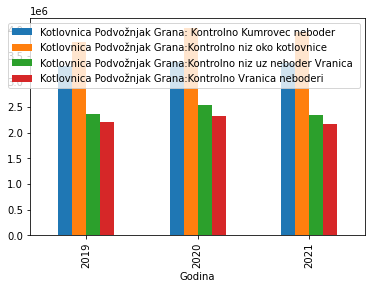

In [165]:
potrosnja.groupby("Godina")[loko[:]].sum().plot(kind="bar")

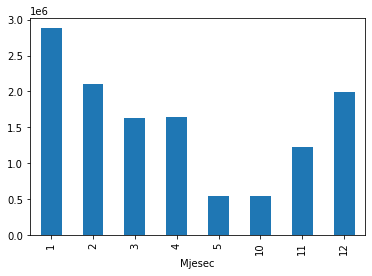

In [170]:
potrosnja["Ukupna potrosnja"]=potrosnja[loko].sum(axis=1)
grouped_month=potrosnja.groupby(["Mjesec"])["Ukupna potrosnja"].mean().plot(kind="bar")

# Satni podaci 

Satni podaci su spašeni u posebnim listovima za svaku od grana, u razdoblju od oko mjesec dana.

In [2]:
file=pd.read_excel("Podvožnjak.xlsx",sheet_name="Sheet1",header=0)
file1=pd.read_excel("Podvožnjak.xlsx",sheet_name="Sheet2",header=None)

file2=pd.read_excel("Podvožnjak.xlsx",sheet_name="Sheet3",header=None)
file3=pd.read_excel("Podvožnjak.xlsx",sheet_name="Sheet4",header=None)

In [3]:
def create_date_range(start,end):
    date_range=pd.date_range(start,end,freq="1H").strftime("%m-%d-%Y, %H:%M")[::-1]
    return date_range

Svakoj grani će se dodijeliti vremenski otisak sa početkom i krajem uzorkovanja.

In [4]:
date_range=create_date_range("2021-12-04 16:00","2022-01-06 11:00")
date_range1=create_date_range("2021-12-04 16:00","2022-01-06 12:00")
date_range2=create_date_range("2021-12-04 16:00","2022-01-06 12:00")
date_range3=create_date_range("2021-12-04 16:00","2022-01-06 12:00")

In [5]:
def set_index1(data,date_range):
    data=data.set_index(date_range)
    return data

In [6]:
file=set_index1(file,date_range)
file1=set_index1(file1,date_range1)
file2=set_index1(file2,date_range2)
file3=set_index1(file3,date_range3)

Kolone će se preimenovati u skladu sa svakom granom.

In [7]:
file.columns=[ "Index", "Datum","Kumrovec-Potrošnja, MWh"]
file1.columns=[ "Index", "Datum","oko kotlovnice-Potrošnja, MWh"]
file2.columns=[ "Index", "Datum","niz uz Vranica-Potrošnja, MWh"]
file3.columns=[ "Index", "Datum","Vranica-Potrošnja, MWh"]

Za svaku granu će se dodijeliti sat, dan i mjesec potrošnje, te dan u sedmici (indeks 1 odgovara ponedjeljku, a indeks 6 nedjelji).

In [8]:
def assign_date_properties(file):
    file=file.assign(Sat=pd.to_datetime(file.index).hour)
    file=file.assign(Mjesec=pd.to_datetime(file.index).month)#format dana i mjeseca zamijenjen
    file=file.assign(Dan=pd.to_datetime(file.index).day)
    file=file.assign(Dan_u_sedmici=pd.to_datetime(file.index).dayofweek)
    return file

In [9]:
file=assign_date_properties(file)
file1=assign_date_properties(file1)
file2=assign_date_properties(file2)
file3=assign_date_properties(file3)

Text(0.5, 1.0, 'Satni podaci potrošnje u razdoblju 4.12.2021. - 6.1.2022. ')

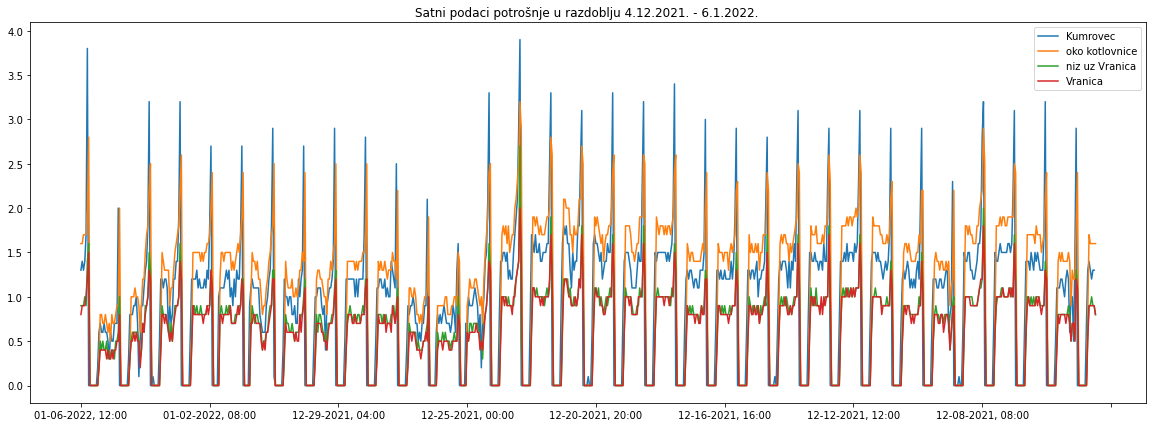

In [10]:
fig, ax = plt.subplots(figsize=(20,7))
file["Kumrovec-Potrošnja, MWh"].plot(ax=ax,label="Kumrovec")
file1["oko kotlovnice-Potrošnja, MWh"].plot(ax=ax,label="oko kotlovnice")
file2["niz uz Vranica-Potrošnja, MWh"].plot(ax=ax,label="niz uz Vranica")
file3["Vranica-Potrošnja, MWh"].plot(ax=ax,label="Vranica")
plt.legend()
plt.title("Satni podaci potrošnje u razdoblju 4.12.2021. - 6.1.2022. ")
#total.plot(ax=ax,label="Ukupno, MW")

Text(0.5, 1.0, 'Potrošnja po danima u posmatranom periodu')

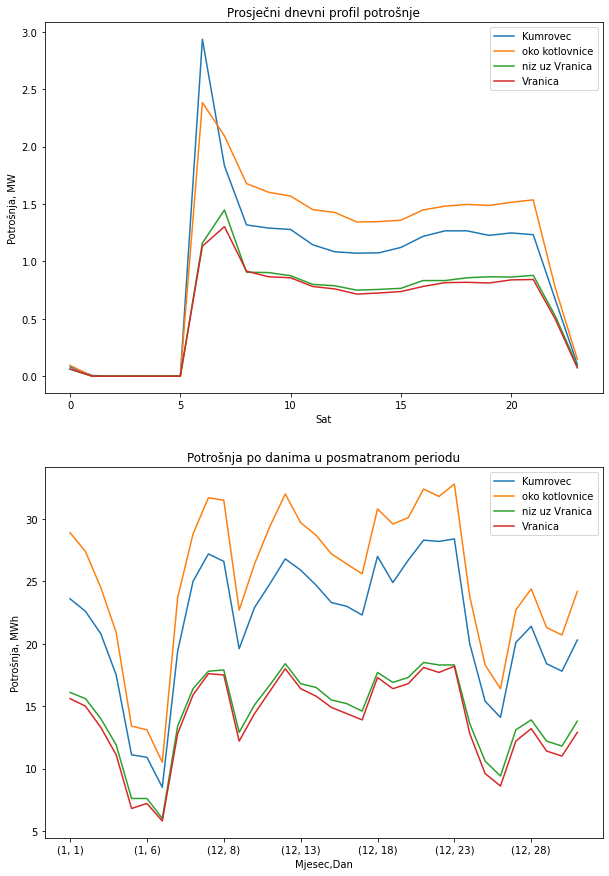

In [11]:
fig, ax = plt.subplots(nrows=2,figsize=(10,15))

filex=file.groupby("Sat")["Kumrovec-Potrošnja, MWh"].mean().plot(ax=ax[0],label="Kumrovec")
filex1=file1.groupby("Sat")["oko kotlovnice-Potrošnja, MWh"].mean().plot(ax=ax[0],label="oko kotlovnice")
filex2=file2.groupby("Sat")["niz uz Vranica-Potrošnja, MWh"].mean().plot(ax=ax[0],label="niz uz Vranica")
filex3=file3.groupby("Sat")["Vranica-Potrošnja, MWh"].mean().plot(ax=ax[0],label="Vranica")
ax[0].set_ylabel("Potrošnja, MW")
ax[0].legend()
ax[0].set_title("Prosječni dnevni profil potrošnje")



file.groupby(["Mjesec","Dan"])["Kumrovec-Potrošnja, MWh"].sum().plot(ax=ax[1],label="Kumrovec")
file1.groupby(["Mjesec","Dan"])["oko kotlovnice-Potrošnja, MWh"].sum().plot(ax=ax[1],label="oko kotlovnice")
file2.groupby(["Mjesec","Dan"])["niz uz Vranica-Potrošnja, MWh"].sum().plot(ax=ax[1],label="niz uz Vranica")
file3.groupby(["Mjesec","Dan"])["Vranica-Potrošnja, MWh"].sum().plot(ax=ax[1],label="Vranica")
ax[1].set_ylabel("Potrošnja, MWh")
ax[1].legend()
ax[1].set_title("Potrošnja po danima u posmatranom periodu")

In [12]:
week=file.groupby(["Dan_u_sedmici","Sat"])["Kumrovec-Potrošnja, MWh"].sum()
week1=file1.groupby(["Dan_u_sedmici","Sat"])["oko kotlovnice-Potrošnja, MWh"].sum()
week2=file2.groupby(["Dan_u_sedmici","Sat"])["niz uz Vranica-Potrošnja, MWh"].sum()
week3=file3.groupby(["Dan_u_sedmici","Sat"])["Vranica-Potrošnja, MWh"].sum()


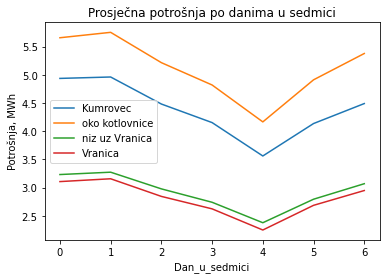

In [13]:
fig, ax = plt.subplots()

week.groupby("Dan_u_sedmici").mean().plot(ax=ax,label="Kumrovec")
week1.groupby("Dan_u_sedmici").mean().plot(ax=ax,label="oko kotlovnice")
week2.groupby("Dan_u_sedmici").mean().plot(ax=ax,label="niz uz Vranica")
week3.groupby("Dan_u_sedmici").mean().plot(ax=ax,label="Vranica")
ax.set_ylabel("Potrošnja, MWh")
ax.legend()
ax.set_title("Prosječna potrošnja po danima u sedmici")
plt.show()